**Trabalho Python Facef - Willyan Luindayk Machado [22327]**

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes.

Os atributos são:

1) Álcool

2) Ácido málico

3) Cinzas

4) Alcalinidade das cinzas

5) Magnésio

6) Fenóis totais

7) Flavanóides

8) Fenóis não flavonóides

9) Proantocianinas

10) Intensidade de cor

11) Matiz

12) OD280 / OD315 de vinhos diluídos

13) Prolina




In [1]:
from google.colab import files
uploaded = files.upload()

# importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# importando o arquivo
df = pd.read_csv('wine.csv')
df.head()

Saving wine.csv to wine.csv


,alcohol,malicacid,ash,alcalinityofash,magnesium,totalphenols,flavanoids,nonflavanoidphenols,proanthocyanins,colorintensity,hue,dilutedwines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Dimensão

In [3]:
print(df.shape)

(178, 14)


Resumo estatístico 

In [4]:
print(df.describe())

          alcohol   malicacid  ...      proline       class
count  178.000000  178.000000  ...   178.000000  178.000000
mean    13.000618    2.336348  ...   746.893258    1.938202
std      0.811827    1.117146  ...   314.907474    0.775035
min     11.030000    0.740000  ...   278.000000    1.000000
25%     12.362500    1.602500  ...   500.500000    1.000000
50%     13.050000    1.865000  ...   673.500000    2.000000
75%     13.677500    3.082500  ...   985.000000    3.000000
max     14.830000    5.800000  ...  1680.000000    3.000000

[8 rows x 14 columns]


Distribuição de classe

In [5]:
print(df.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


Visualização dos dados

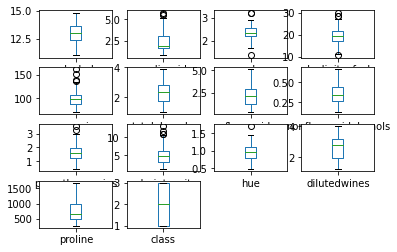

In [9]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

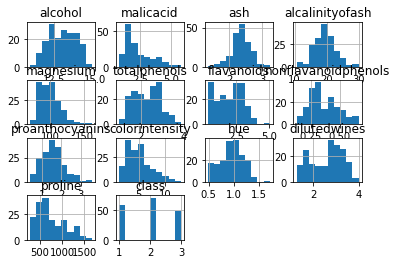

In [10]:
# histograma
df.hist()
plt.show()

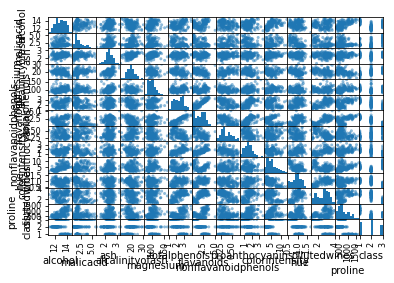

In [11]:
# gráfico de dispersão
scatter_matrix(df)
plt.show()

Criar conjunto de validação

In [24]:
# conjunto de validação
array = df.values
X = array[:,0:12]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [25]:
# métricas
seed = 10
scoring = 'accuracy'

Regressão Logística (LR)
Análise Linear Discriminante (LDA)
K-vizinhos mais próximos (KNN)
Árvores de Classificação (Decision Tree) e Regressão (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)

In [26]:
# algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.893333 (0.102446)
LDA: 0.964286 (0.047916)
KNN: 0.802381 (0.101603)
CART: 0.894762 (0.056522)
NB: 0.957143 (0.057143)
SVM: 0.858095 (0.095874)


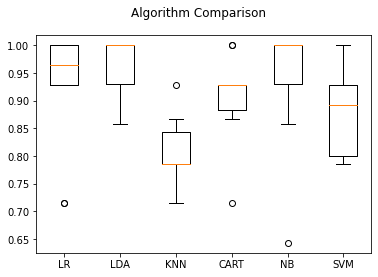

In [22]:
# comparar algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7777777777777778
[[ 7  0  0]
 [ 3 13  1]
 [ 3  1  8]]
              precision    recall  f1-score   support

         1.0       0.54      1.00      0.70         7
         2.0       0.93      0.76      0.84        17
         3.0       0.89      0.67      0.76        12

    accuracy                           0.78        36
   macro avg       0.79      0.81      0.77        36
weighted avg       0.84      0.78      0.79        36

